<a href="https://colab.research.google.com/github/girupashankar/Data_Analysis_Projects_Using_Python/blob/main/EV_Market_Share_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric Vehicles Market Size Analysis

## Problem Definition

Electric Vehicles Market Size Analysis: Process We Can Follow
Market size analysis for electric vehicles involves a multi-step process that includes defining the market scope, collecting and preparing data, analytical modelling, and communicating findings through visualization and reporting. Below is the process you can follow for the task of electric vehicles market size analysis:

1. Define whether the analysis is global, regional, or focused on specific countries.
2. Gather information from industry associations, market research firms (e.g., BloombergNEF, IEA), and government publications relevant to the EV market.
3. Use historical data to identify trends in EV sales, production, and market.
4. Analyze the market size and growth rates for different EV segments.
5. Based on the market size analysis, provide strategic recommendations for businesses looking to enter or expand in the EV market.
So, we need an appropriate dataset for the task of market size analysis of electric vehicles. I found an ideal dataset for this task.

## Step 1: Data Collection

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

ev_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub/Data Analysis/EV Market Size Analysis/Electric_Vehicle_Population_Data.csv")
print(ev_data)

       VIN (1-10)     County       City State  Postal Code  Model Year  \
0      5YJYGDEE1L       King    Seattle    WA        98122        2020   
1      7SAYGDEE9P  Snohomish    Bothell    WA        98021        2023   
2      5YJSA1E4XK       King    Seattle    WA        98109        2019   
3      5YJSA1E27G       King   Issaquah    WA        98027        2016   
4      5YJYGDEE5M     Kitsap  Suquamish    WA        98392        2021   
...           ...        ...        ...   ...          ...         ...   
78408  WP1AE2A2XG  Snohomish  Snohomish    WA        98296        2016   
78409  JN1DF0CD0P     Pierce   Puyallup    WA        98374        2023   
78410  KM8JFDA25P       King    Seattle    WA        98112        2023   
78411  1FMCU0LZ3N       King  Newcastle    WA        98056        2022   
78412  4JGDM4EBXP       King   Bellevue    WA        98004        2023   

                Make          Model                   Electric Vehicle Type  \
0              TESLA        MODE

**Observation**
* So, this data is based on the EV population in the United States. Now, let’s clean the dataset before moving forward:

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78413 entries, 0 to 78412
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         78413 non-null  object 
 1   County                                             78413 non-null  object 
 2   City                                               78413 non-null  object 
 3   State                                              78413 non-null  object 
 4   Postal Code                                        78413 non-null  int64  
 5   Model Year                                         78413 non-null  int64  
 6   Make                                               78413 non-null  object 
 7   Model                                              78413 non-null  object 
 8   Electric Vehicle Type                              78413 non-null  object 
 9   Clean 

In [4]:
null_val=ev_data.isnull().sum()
print(null_val)

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 4
DOL Vehicle ID                                       1
Vehicle Location                                     1
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64


In [5]:
ev_data = ev_data.dropna()
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64



**Observation**
* For the task of market size of electric vehicles analysis, we can explore the following areas:

1. EV Adoption Over Time: Analyze the growth of the EV population by model year.
2. Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
3. EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
4. Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
5. Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
6. Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.
* Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Model Year
1998        1
2000        3
2002        1
2008       11
2010       13
2011      323
2012      632
2013     1803
2014     1439
2015     2036
2016     2412
2017     3647
2018     6458
2019     4814
2020     5170
2021     8360
2022    12152
2023    25825
2024     3309
Name: count, dtype: int64


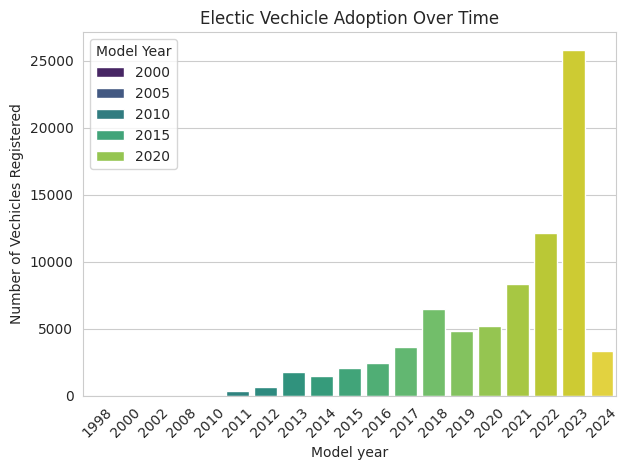

In [7]:
# EV Adoption Over Time
ev_adoption_by_year = ev_data["Model Year"].value_counts().sort_index()
print(ev_adoption_by_year)
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, hue=ev_adoption_by_year.index, palette="viridis")
plt.title("Electic Vechicle Adoption Over Time")
plt.xlabel("Model year")
plt.ylabel("Number of Vechicles Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation**
* From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

In [8]:
# geographical distribution at country level
ev_county_distribution = ev_data["County"].value_counts()
ev_county_distribution

County
King            57330
Clark            7068
Snohomish        4124
Kitsap           3553
Thurston         2942
Cowlitz           632
Jefferson         604
Yakima            518
Pierce            477
Island            259
Spokane           155
Clallam           125
Whatcom           110
Skagit             82
Benton             54
Chelan             47
Klickitat          41
Stevens            40
Lewis              35
Grant              29
Grays Harbor       28
San Juan           24
Kittitas           23
Mason              20
Whitman            17
Walla Walla        17
Skamania           12
Franklin           10
Douglas             8
Pacific             7
Okanogan            5
Wahkiakum           4
Pend Oreille        4
Adams               2
Asotin              1
Columbia            1
Lincoln             1
Name: count, dtype: int64

In [9]:
top_counties = ev_county_distribution.head(3).index
top_counties

Index(['King', 'Clark', 'Snohomish'], dtype='object', name='County')

In [10]:
# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data["County"].isin(top_counties)]
top_counties_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0.0,1.0,290605598.0,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78406,WBY1Z2C56E,King,Vashon,WA,98070,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,106455016.0,POINT (-122.46049 47.44873),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
78407,7SAYGDEE2P,King,Mercer Island,WA,98040,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,260401011.0,POINT (-122.2377542 47.582905),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
78408,WP1AE2A2XG,Snohomish,Snohomish,WA,98296,2016,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,1.0,9566700.0,POINT (-122.15134 47.8851158),PUGET SOUND ENERGY INC,5.306105e+10
78410,KM8JFDA25P,King,Seattle,WA,98112,2023,HYUNDAI,TUCSON,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,43.0,237910354.0,POINT (-122.30764 47.62523),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [11]:
# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(["County", "City"]).size().sort_values(ascending=False).reset_index(name="Number of Vechicles")
ev_city_distribution_top_counties

,County,City,Number of Vechicles
0,King,Seattle,18782
1,King,Bellevue,6372
2,Clark,Vancouver,4279
3,King,Sammamish,3788
4,King,Kirkland,3592
...,...,...,...
68,King,Skykomish,6
69,Snohomish,Darrington,5
70,Snohomish,Tulalip,3
71,Snohomish,Index,1


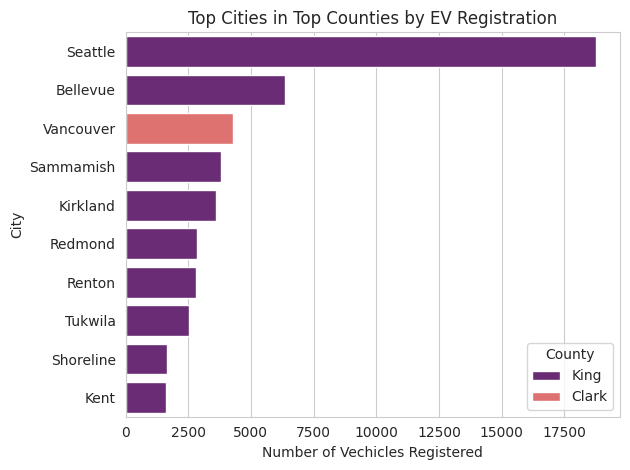

In [12]:
# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)
# plt.figure(figsize=(12, 8))
sns.barplot(x="Number of Vechicles", y="City", hue="County", data=top_cities, palette="magma")
plt.title("Top Cities in Top Counties by EV Registration")
plt.xlabel("Number of Vechicles Registered")
plt.ylabel("City")
plt.legend(title="County")
plt.tight_layout()
plt.show()


Observation 🤔:
##### The above graph compares the number of electric vehicles registered in various cities within three counties: King, Clark, Snohomish. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:
* Seattle, which is in King County, has the highest number of EV registrations by a significant marigin, far outpacing the other cities listed.
* Bellevue also in kinng county, follow seattle with the next highest registrations, though these are considerably less than Seattke's.
* Vancouver, Which is in Clark County, has the third highest number of EV registration.
* Cities in Snohomish County are not in the top 10 EV registered Cities.
* Sammamish and Kirkland, Which is in King County, Shows moderate EV registrations.
* The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
* Overall, the graph indicates the EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.



>Next, let's explore the types of electric vehicles represented in this dataset.   
Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vechicles(PHEV), can provide insights into consumer preferences and the adoptionn patterns of purely electric vs Hybrid Electic Solutions.  
* So, let's visualize the distribution of electric vehicle types to see which categories are most popular among the registered vechicles:

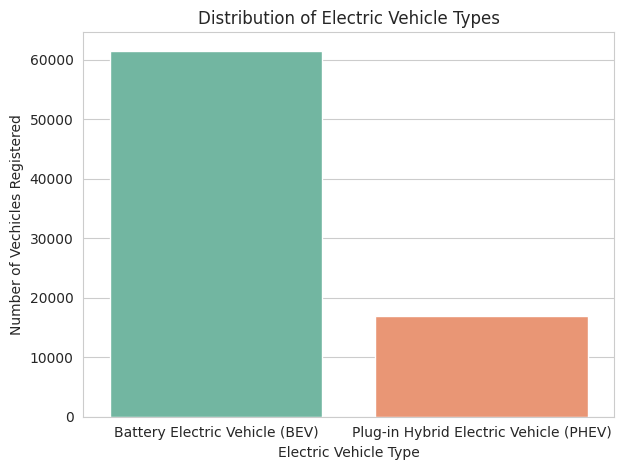

In [13]:
# analyzing the distribution of electric vehicle Types

import matplotlib.pyplot as plt
ev_type_distribution = ev_data["Electric Vehicle Type"].value_counts()
ev_type_distribution
sns.barplot(x=ev_type_distribution.index, y=ev_type_distribution.values, hue=ev_type_distribution.index, legend=False, palette="Set2")
plt.title("Distribution of Electric Vehicle Types")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Number of Vechicles Registered")
plt.tight_layout()
plt.show()

In [14]:
import plotly.express as px

fig = px.bar(ev_type_distribution,
             title="Distribution of Electric Vehicle Types",
             x=ev_type_distribution.index,
             y=ev_type_distribution.values,
             color=ev_type_distribution.values,
             color_discrete_map={"BEV": "blue", "PHEV": "orange"}
             )

fig.update_layout(
    title_font=dict(size=16),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    xaxis_tickangle=-45,
    yaxis=dict(tickfont=dict(size=12)),
    margin=dict(l=80, r=40, t=80, b=30),
    plot_bgcolor="white",
    paper_bgcolor="white",
    showlegend=False
)

fig.update_xaxes(tickfont=dict(size=10), showline=True, linewidth=1, linecolor="black")

fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor="gray")

fig.show()


Observation 📗: The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.  


>Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility

So, let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:

In [15]:
# analyzing the popularity of EV manufactures
ev_make_distribution = ev_data["Make"].value_counts().head(10) # Limiting to top 10 for clarity
ev_make_distribution


Make
TESLA         35580
NISSAN         6151
CHEVROLET      5681
BMW            3539
FORD           3302
KIA            3135
TOYOTA         2554
VOLKSWAGEN     2154
JEEP           2146
VOLVO          2000
Name: count, dtype: int64

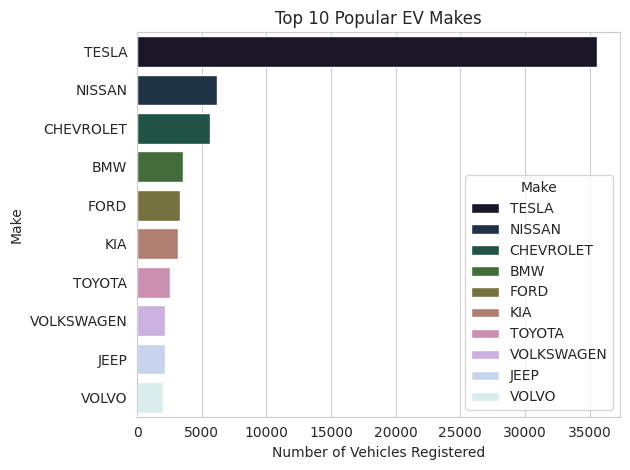

In [16]:
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, hue=ev_make_distribution.index, legend=True, palette="cubehelix")
plt.title("Top 10 Popular EV Makes")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

Observation 🤔:   
The above chart shows that:  
* TESLA leads by a substantial margin with the highest number of vechicles registered.
  
* NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.

* FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP and HYUNDAI follow in decreasing order of the number of registered vechicles.

>Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

In [17]:
# selecting the top 3 manufacturers based on the number of vehicles register
top_3_makes = ev_make_distribution.head(3).index
print(top_3_makes)

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object', name='Make')


In [18]:
# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data["Make"].isin(top_3_makes)]
top_makes_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78402,5YJ3E1EB3N,Pierce,Lakewood,WA,98498,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,28.0,211414535.0,POINT (-122.547645 47.176685),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
78404,KL8CL6S03G,King,Seattle,WA,98126,2016,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,34.0,132960187.0,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
78405,7SAYGDEF8N,King,Redmond,WA,98053,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,185537460.0,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
78407,7SAYGDEE2P,King,Mercer Island,WA,98040,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,260401011.0,POINT (-122.2377542 47.582905),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [19]:
# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
ev_model_distribution_top_makes

,Make,Model,Number of Vehicles
0,TESLA,MODEL Y,15986
1,TESLA,MODEL 3,13469
2,NISSAN,LEAF,5935
3,TESLA,MODEL S,3395
4,CHEVROLET,BOLT EV,2934
5,TESLA,MODEL X,2704
6,CHEVROLET,VOLT,1738
7,CHEVROLET,BOLT EUV,889
8,NISSAN,ARIYA,216
9,CHEVROLET,SPARK,105


In [20]:
# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)
top_models

,Make,Model,Number of Vehicles
0,TESLA,MODEL Y,15986
1,TESLA,MODEL 3,13469
2,NISSAN,LEAF,5935
3,TESLA,MODEL S,3395
4,CHEVROLET,BOLT EV,2934
5,TESLA,MODEL X,2704
6,CHEVROLET,VOLT,1738
7,CHEVROLET,BOLT EUV,889
8,NISSAN,ARIYA,216
9,CHEVROLET,SPARK,105


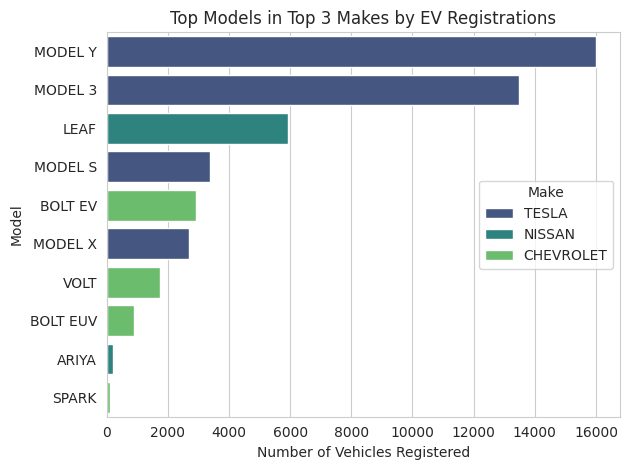

In [21]:
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

Observation 💭:  
The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:
* TESLA'S MODEL Y and MODEL 3 are the most registered vechicles, with MODEL Y having the highest number of registration.
* NISSAN's LEAF is the third most registered model and the most registered non-TESLA vehicle.
* TESLA's MODEL S AND MODEL X also have a significant number of registrations.
* CHEVROLET's BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOULT EUV.
* NISSAN's ARIYA and CHEVROLET's SPARK have the least number of registrations among the models shown.

>Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:

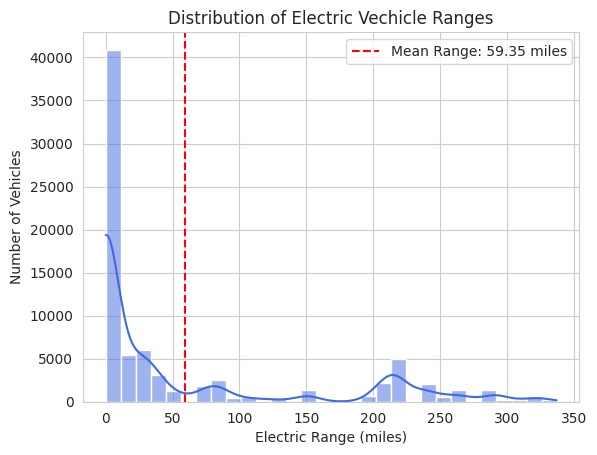

In [22]:
# analyzing the distribution of electric range
sns.histplot(ev_data["Electric Range"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Electric Vechicle Ranges")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Vehicles")
plt.axvline(ev_data["Electric Range"].mean(), color="red", linestyle="--", label=f"Mean Range: {ev_data['Electric Range'].mean():.2f} miles")
plt.legend()
plt.show()

Observations 🚙:  
The above graph shows the mean electric range.  Key observations from the graph include:  
* There is a high frequency of Vechicles with a significant peak occurring just before 50 miles.  
* The distribution is skewed to the right, with along tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.  
* The mean electric range for this set of vehicles is marked at approximately 59.35 miles, which is relatively low compared to the highest ranges shown in the graph.  
* Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vechicles have a range below the mean.



**It suggests theat while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.**

>Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety):

In [27]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby("Model Year")["Electric Range"].mean().reset_index()
print(average_range_by_year)

    Model Year  Electric Range
0         1998       58.000000
1         2000       58.000000
2         2002       95.000000
3         2008      220.000000
4         2010      233.846154
5         2011       71.566563
6         2012       65.645570
7         2013       82.790349
8         2014       84.555247
9         2015      100.233792
10        2016      103.900912
11        2017      114.690430
12        2018      158.641065
13        2019      178.522435
14        2020      239.686654
15        2021       11.653589
16        2022        4.466837
17        2023        4.128906
18        2024       17.427017


In [28]:
import plotly.express as px
fig = px.line(average_range_by_year, x="Model Year", y="Electric Range",
              markers=True, title="Average Electric Range by Model Year")
fig.update_traces(line_color='green')
fig.show()

Observation 🧑:  
* There is general upward trend in the average electric range of EVs over the year, indicating improvements in technology and battery efficiency.
* There is a noticeable peak around the year 2020 when the average range reaches its highest point.
* Following 2020, there's a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
* After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

>Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:

         Make         Model  Electric Range
0       TESLA      ROADSTER      234.423077
1       TESLA       MODEL S      177.845655
2   CHEVROLET       BOLT EV      147.691888
3       TESLA       MODEL X      135.834689
4       TESLA       MODEL 3      110.655283
5      NISSAN          LEAF       84.675316
6   CHEVROLET         SPARK       82.000000
7   CHEVROLET          VOLT       45.738205
8       TESLA       MODEL Y       18.949769
9   CHEVROLET     BLAZER EV        0.000000
10  CHEVROLET      BOLT EUV        0.000000
11  CHEVROLET  SILVERADO EV        0.000000
12     NISSAN         ARIYA        0.000000


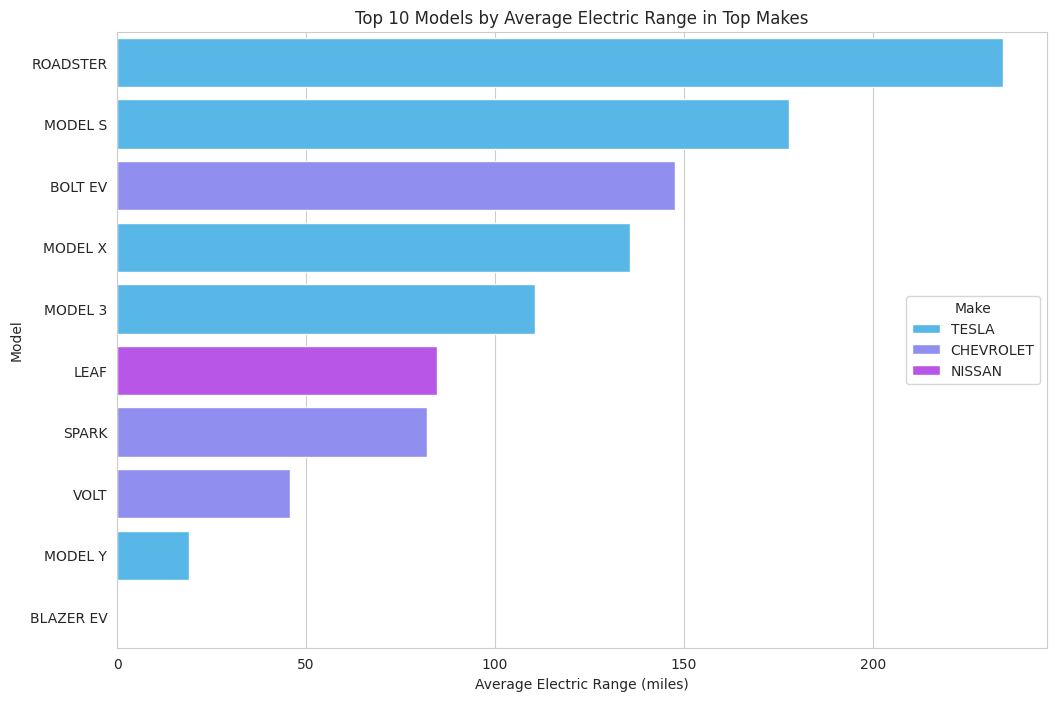

In [32]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
print(average_range_by_model)
# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

# Estimated Market Size Analysis of Electric Vehicles in the United States

Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:

In [33]:
# calculate the number of EVs registered eaach year
ev_registration_counts = ev_data["Model Year"].value_counts().sort_index()
ev_registration_counts

Model Year
1998        1
2000        3
2002        1
2008       11
2010       13
2011      323
2012      632
2013     1803
2014     1439
2015     2036
2016     2412
2017     3647
2018     6458
2019     4814
2020     5170
2021     8360
2022    12152
2023    25825
2024     3309
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

* In 2021, 8360 there were  EVs registered.
* In 2022, the number increased to 12,152 EVs.
* In 2023, a significant jump to 25,825 EVs was observed.
* For 2024, currently, 3,309 EVs are registered, which suggests partial data.  
To forecast the total number of EVs expected to be registered in 2024 we can use a growth rate based approach from previous complete years.

>We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:



In [34]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 35972.40638517547, 2025: 55094.957608243174, 2026: 84382.8550515055, 2027: 129239.88937924222, 2028: 197942.4492874017, 2029: 303166.5642712055}


Now, let’s plot the estimated market size data:

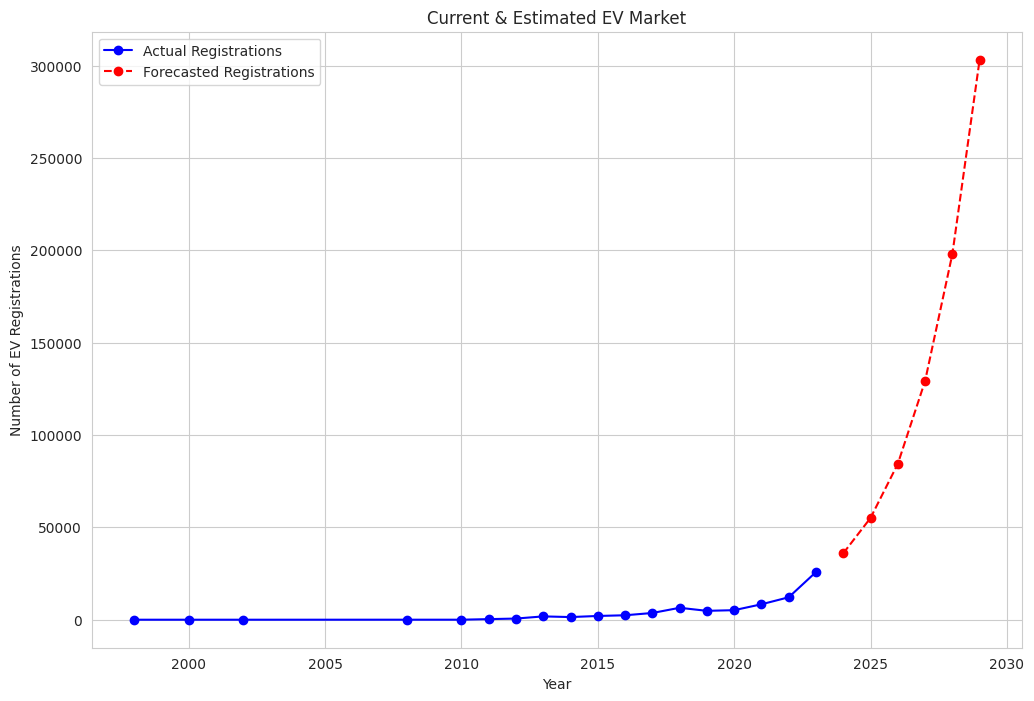

In [35]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()